# **Projeto de Bioinformática e Análise de Dados - Descoberta Computacional de Fármacos**

## **Análise Exploratória de Dados**


Neste Jupyter notebook, construiremos um modelo de aprendizado de máquina usando os dados de bioatividade do ChEMBL.

Realizaremos o Cálculo de Descritores e a Análise Exploratória de Dados.

---


## **Instalar sys**

In [38]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Carregar dados de bioatividade**

In [2]:
import pandas as pd

C:\Users\danii\AppData\Local\Temp\ipykernel_10972\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('dengue_bioactivity_data_preprocessed.csv')

## **Calcular Descritores de Lipinski**
Christopher Lipinski, um cientista da Pfizer, desenvolveu um conjunto de regras práticas para avaliar a **semelhança com fármacos** de compostos. Essa semelhança com fármacos é baseada na Absorção, Distribuição, Metabolismo e Excreção (ADME), também conhecida como o perfil farmacocinético. Lipinski analisou todos os medicamentos aprovados pela FDA com atividade oral na formulação do que ficou conhecido como a **Regra dos Cinco** ou **Regra de Lipinski**.

A Regra de Lipinski afirma o seguinte:
* Peso molecular < 500 Dalton
* Coeficiente de partição octanol-água (LogP) < 5
* Doadores de ligações de hidrogênio < 5
* Aceitadores de ligações de hidrogênio < 10


### **Importar bibliotecas**

In [39]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calcular descritores**

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [40]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combinar DataFrames**

Vamos dar uma olhada nos 2 DataFrames que serão combinados.

In [41]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,409.486,2.1241,2.0,5.0
1,474.517,4.5496,1.0,6.0
2,582.678,6.0240,3.0,7.0
3,456.668,3.4091,4.0,6.0
4,481.118,2.8128,6.0,6.0
5,409.432,4.8883,2.0,3.0
6,985.127,0.6131,8.0,20.0
7,430.308,5.7610,2.0,6.0
8,373.334,4.9884,1.0,5.0
9,875.106,5.6014,3.0,14.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,100000.0,inactive
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,730.0,active
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,6800.0,intermediate
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,6900.0,intermediate
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,6500.0,intermediate
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,13070.0,inactive
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,500.0,active
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,5000.0,intermediate
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,5000.0,intermediate
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,1660.0,intermediate


Agora, vamos combinar os 2 DataFrame

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,100000.0,inactive,409.486,2.1241,2.0,5.0
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,730.0,active,474.517,4.5496,1.0,6.0
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,6800.0,intermediate,582.678,6.0240,3.0,7.0
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,6900.0,intermediate,456.668,3.4091,4.0,6.0
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,6500.0,intermediate,481.118,2.8128,6.0,6.0
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,13070.0,inactive,409.432,4.8883,2.0,3.0
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,500.0,active,985.127,0.6131,8.0,20.0
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,5000.0,intermediate,430.308,5.7610,2.0,6.0
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,5000.0,intermediate,373.334,4.9884,1.0,5.0
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,1660.0,intermediate,875.106,5.6014,3.0,14.0


### **Converter IC50 para pIC50**
Para permitir que os dados de **IC50** sejam distribuídos de forma mais uniforme, iremos converter **IC50** para a escala logarítmica negativa, que é essencialmente **-log10(IC50)**.

Esta função personalizada pIC50() aceitará um DataFrame como entrada e irá:
* Pegar os valores de IC50 da coluna ``standard_value`` e convertê-los de nM para M, multiplicando o valor por 10$^{-9}$
* Pegar o valor molar e aplicar -log10
* Excluir a coluna ``standard_value`` e criar uma nova coluna ``pIC50``


In [42]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis='columns') # Changed 1 to axis='columns'

    return x

Ponto a ser observado: valores maiores que 100.000.000 serão fixados em 100.000.000, caso contrário, o valor logarítmico negativo se tornará negativo.

In [43]:
df_combined.standard_value.describe()

count        10.000000
mean      14616.000000
std       30229.104519
min         500.000000
25%        2495.000000
50%        5750.000000
75%        6875.000000
max      100000.000000
Name: standard_value, dtype: float64

In [15]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [44]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

Primeiro, aplicaremos a função norm_value() para que os valores na coluna standard_value sejam normalizados.

In [45]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,inactive,409.486,2.1241,2.0,5.0,100000.0
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,active,474.517,4.5496,1.0,6.0,730.0
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.0240,3.0,7.0,6800.0
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,intermediate,456.668,3.4091,4.0,6.0,6900.0
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,intermediate,481.118,2.8128,6.0,6.0,6500.0
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,inactive,409.432,4.8883,2.0,3.0,13070.0
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,active,985.127,0.6131,8.0,20.0,500.0
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,intermediate,430.308,5.7610,2.0,6.0,5000.0
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,intermediate,373.334,4.9884,1.0,5.0,5000.0
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,intermediate,875.106,5.6014,3.0,14.0,1660.0


In [46]:
df_norm.standard_value_norm.describe()

count        10.000000
mean      14616.000000
std       30229.104519
min         500.000000
25%        2495.000000
50%        5750.000000
75%        6875.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [20]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,inactive,409.486,2.1241,2.0,5.0,4.000000
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,active,474.517,4.5496,1.0,6.0,6.136677
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.0240,3.0,7.0,5.167491
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,intermediate,456.668,3.4091,4.0,6.0,5.161151
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,intermediate,481.118,2.8128,6.0,6.0,5.187087
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,inactive,409.432,4.8883,2.0,3.0,4.883724
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,active,985.127,0.6131,8.0,20.0,6.301030
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,intermediate,430.308,5.7610,2.0,6.0,5.301030
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,intermediate,373.334,4.9884,1.0,5.0,5.301030
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,intermediate,875.106,5.6014,3.0,14.0,5.779892


In [21]:
df_final.pIC50.describe()

count    10.000000
mean      5.321911
std       0.653236
min       4.000000
25%       5.162736
50%       5.244058
75%       5.660176
max       6.301030
Name: pIC50, dtype: float64

### **Removendo a classe de bioatividade 'intermediária' e 'nula'**
Aqui, removeremos a classe ``intermediária`` do nosso conjunto de dados.

In [47]:
df_2class = df_final[(df_final.bioactivity_class != 'intermediate') & (df_final.bioactivity_class.notna())]
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,inactive,409.486,2.1241,2.0,5.0,4.000000
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,active,474.517,4.5496,1.0,6.0,6.136677
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,inactive,409.432,4.8883,2.0,3.0,4.883724
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,active,985.127,0.6131,8.0,20.0,6.301030


---

## **Análise Exploratória de Dados (Análise do Espaço Químico) via descritores de Lipinski**

### **Importar biblioteca**

In [48]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Gráfico de frequência das 2 classes de bioatividade**

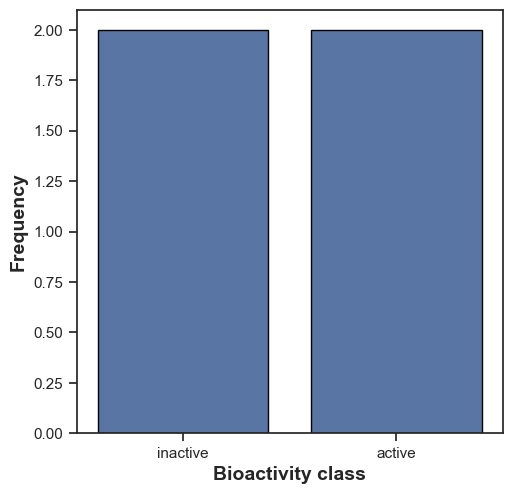

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Diagrama de dispersão de MW versus LogP**

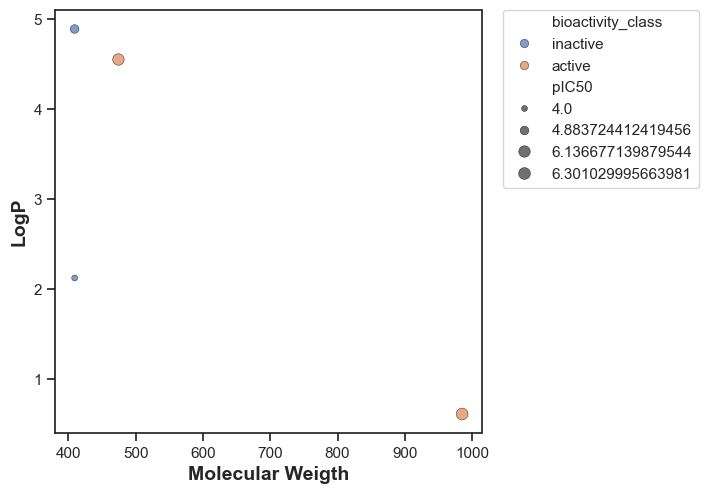

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Molecular Weigth', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Diagramas de caixa**

#### **valor pIC50**

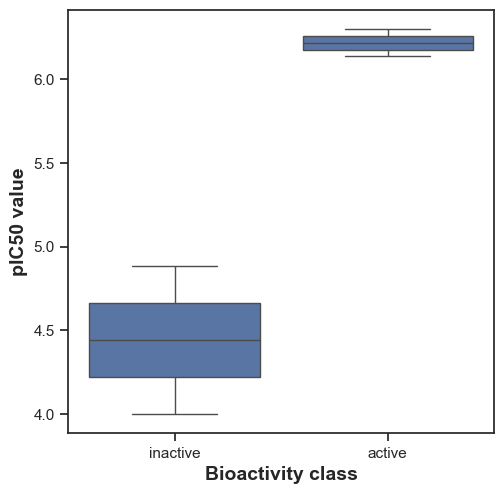

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Análise estatística | Teste U de Mann-Whitney**

In [52]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [53]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4.0,0.333333,0.05,Same distribution (fail to reject H0)


#### **Molecular Weight**

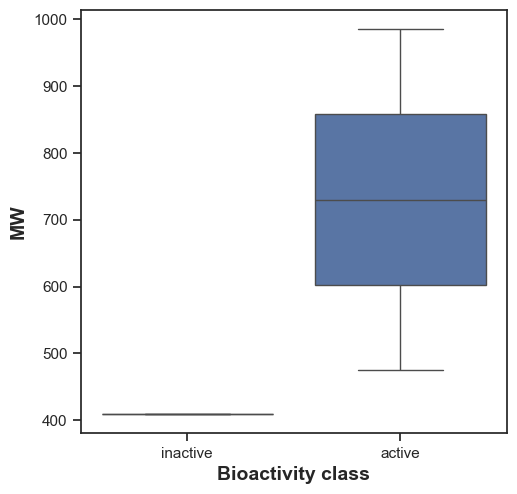

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [30]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4.0,0.333333,0.05,Same distribution (fail to reject H0)


#### **LogP**

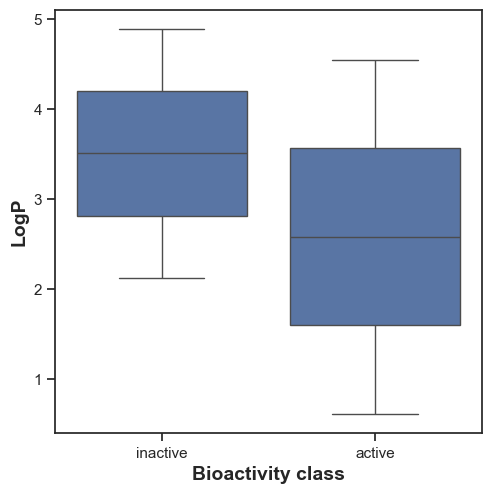

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Análise estatística | Teste U de Mann-Whitney**

In [32]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1.0,0.666667,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

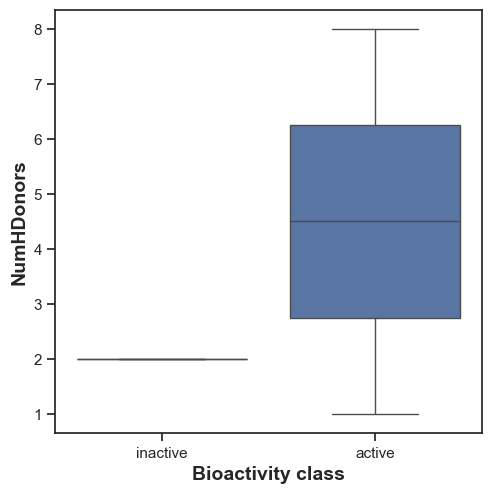

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Análise estatística | Teste U de Mann-Whitney**

In [34]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2.0,1.0,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

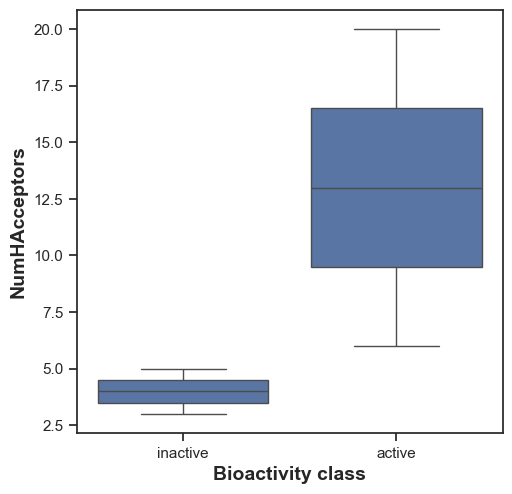

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [36]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4.0,0.333333,0.05,Same distribution (fail to reject H0)
